<a href="https://colab.research.google.com/github/Josephine-Analytics/Exploratory-Data-Analysis-with-Python/blob/main/Credit_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
credit = pd.read_csv('//content/drive/MyDrive/credit_train(in) (1).csv')
credit.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0


**EXPLORATORY DATA ANALYSIS, EDA**

In [9]:
#checking for duplicates
credit.duplicated().sum()

np.int64(10215)

In [10]:
#remove duplicates and check for the new dimension of the Dataframe
credit.drop_duplicates(inplace=True)
credit.shape

(89785, 19)

In [11]:
#Generate statistics description
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.978500e+04,70631.000000,7.063100e+04,89785.000000,89785.000000,41448.000000,89785.000000,89785.000000,8.978500e+04,8.978300e+04,89595.000000,89776.000000
mean,1.306089e+07,1130.830598,1.375894e+06,18396.906410,18.248642,34.975873,11.123250,0.164983,2.940351e+05,7.756565e+05,0.115531,0.028605
std,3.329556e+07,1571.037395,1.104852e+06,12145.282372,7.034607,22.008585,4.998884,0.478010,3.722277e+05,8.803517e+06,0.347919,0.255108
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,708.000000,8.479320e+05,10157.400000,13.500000,16.000000,8.000000,0.000000,1.129360e+05,2.770680e+05,0.000000,0.000000
50%,3.138740e+05,729.000000,1.168975e+06,16140.310000,17.000000,32.000000,10.000000,0.000000,2.097220e+05,4.726920e+05,0.000000,0.000000
75%,5.323780e+05,742.000000,1.648915e+06,23918.910000,21.700000,51.000000,14.000000,0.000000,3.675170e+05,7.914500e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [14]:
#check for nulls
credit.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,19154
Annual Income,19154
Years in current job,3802
Home Ownership,0
Purpose,0


In [15]:
#observe columns
credit.columns


Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [16]:
#summery of all columns with one code instead of performing different methods in different code blocks
import pandas as pd

def check(df):
    L = []
    columns = df.columns
    for col in columns:
        dtypes = df[col].dtype
        describe = df[col].describe()
        shape = df[col].shape
        nunique = df[col].nunique()
        sum_null = df[col].isnull().sum()

        L.append([col, dtypes, nunique, shape, describe, sum_null])

    df_check = pd.DataFrame(L)
    df_check.columns = ["column", "dtype", "nunique", "shape", "describe", "sum_null"]

    return df_check

check(credit)


,column,dtype,nunique,shape,describe,sum_null
0,Loan ID,object,81999,"(89785,)",count 89785...,0
1,Customer ID,object,81999,"(89785,)",count 89785...,0
2,Loan Status,object,2,"(89785,)",count 89785 unique 2 top ...,0
3,Current Loan Amount,int64,22004,"(89785,)",count 8.978500e+04 mean 1.306089e+07 st...,0
4,Term,object,2,"(89785,)",count 89785 unique 2 top ...,0
5,Credit Score,float64,324,"(89785,)",count 70631.000000 mean 1130.830598 st...,19154
6,Annual Income,float64,36174,"(89785,)",count 7.063100e+04 mean 1.375894e+06 st...,19154
7,Years in current job,object,11,"(89785,)",count 85983 unique 11 top ...,3802
8,Home Ownership,object,4,"(89785,)",count 89785 unique ...,0
9,Purpose,object,16,"(89785,)",count 89785 unique ...,0


In [19]:
#analyze a few columns
credit["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [22]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89785 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       89785 non-null  object 
 1   Customer ID                   89785 non-null  object 
 2   Loan Status                   89785 non-null  object 
 3   Current Loan Amount           89785 non-null  int64  
 4   Term                          89785 non-null  object 
 5   Credit Score                  70631 non-null  float64
 6   Annual Income                 70631 non-null  float64
 7   Years in current job          85983 non-null  object 
 8   Home Ownership                89785 non-null  object 
 9   Purpose                       89785 non-null  object 
 10  Monthly Debt                  89785 non-null  float64
 11  Years of Credit History       89785 non-null  float64
 12  Months since last delinquent  41448 non-null  float64
 13  Number

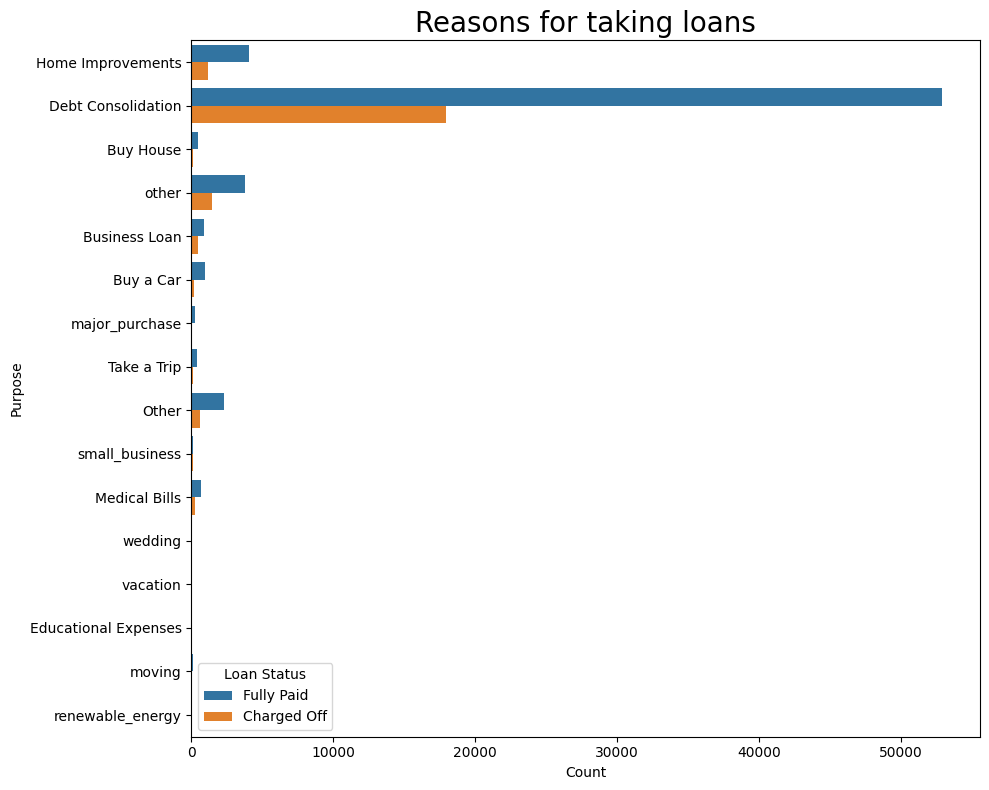

In [37]:
#analyze reasons for taking loans with count plot
plt.figure(figsize=(10,8)) # Increased figure height for better readability
sns.countplot(y="Purpose", data=credit, hue = "Loan Status") # y="Purpose" for horizontal count plot
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.title("Reasons for taking loans", fontsize = 20)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()